In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [2]:
# Cargando Datos Para la Exploración inicial

df = pd.read_csv('../data/raw/DatabaseBio.csv', sep=";")
df.info()
df.head()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     3565 non-null   object
 1   abstract  3565 non-null   object
 2   group     3565 non-null   object
dtypes: object(3)
memory usage: 83.7+ KB


np.int64(0)

In [3]:
# Valores Únicos
print(df['group'].value_counts())

group
neurological                                           1058
cardiovascular                                          645
hepatorenal                                             533
neurological|cardiovascular                             308
oncological                                             237
neurological|hepatorenal                                202
cardiovascular|hepatorenal                              190
neurological|oncological                                143
hepatorenal|oncological                                  98
cardiovascular|oncological                               70
neurological|cardiovascular|hepatorenal                  28
neurological|hepatorenal|oncological                     26
neurological|cardiovascular|oncological                  13
cardiovascular|hepatorenal|oncological                    7
neurological|cardiovascular|hepatorenal|oncological       7
Name: count, dtype: int64


In [5]:
# Estadísticos de la longitud del título  y el resumen
df['title_length'] = df['title'].apply(len)
df['abstract_length'] = df['abstract'].apply(len)

print("\nEstadísticas de longitud de título:")
print(df['title_length'].describe())
print("\nEstadísticas de longitud de abstract:")
print(df['abstract_length'].describe())


Estadísticas de longitud de título:
count    3565.000000
mean       69.345021
std        36.671448
min        20.000000
25%        43.000000
50%        55.000000
75%        88.000000
max       294.000000
Name: title_length, dtype: float64

Estadísticas de longitud de abstract:
count    3565.000000
mean      696.545582
std       579.555153
min       180.000000
25%       271.000000
50%       312.000000
75%      1138.000000
max      3814.000000
Name: abstract_length, dtype: float64


In [6]:
# Verificar estructura
print("Dimensiones del dataset:", df.shape)
print("\n🔍 Primeras filas:")
print(df.head())

Dimensiones del dataset: (3565, 5)

🔍 Primeras filas:
                                               title  \
0  Adrenoleukodystrophy: survey of 303 cases: bio...   
1  endoscopy reveals ventricular tachycardia secrets   
2        dementia and cholecystitis: organ interplay   
3  The interpeduncular nucleus regulates nicotine...   
4       guillain-barre syndrome pathways in leukemia   

                                            abstract  \
0  Adrenoleukodystrophy ( ALD ) is a genetically ...   
1  Research question: How does metformin affect c...   
2  Purpose: This randomized controlled study exam...   
3  Partial lesions were made with kainic acid in ...   
4  Hypothesis: statins improves stroke outcomes v...   

                      group  title_length  abstract_length  
0  neurological|hepatorenal            80             1332  
1              neurological            49              281  
2               hepatorenal            43              291  
3              neurological 

In [7]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
title              0
abstract           0
group              0
title_length       0
abstract_length    0
dtype: int64


In [8]:
# Analizar la columna 'group' (que es multi-etiqueta)
# Convertir la columna group de string a lista by splitting on the pipe character
df['group'] = df['group'].apply(lambda x: x.split('|'))

In [9]:
# Explorar las etiquetas únicas en group
etiquetas_unicas = set([etiqueta.strip() for sublist in df['group'] for etiqueta in sublist])
print(etiquetas_unicas)

{'hepatorenal', 'oncological', 'cardiovascular', 'neurological'}


In [10]:
df['group'] = df['group'].apply(lambda x: [etiqueta.strip().lower() for etiqueta in x])
categorias = ['cardiovascular', 'neurological', 'hepatorenal', 'oncological']
for categoria in categorias:
    df[categoria] = df['group'].apply(lambda x: 1 if categoria in x else 0)

In [11]:
# Mostrando Distribución de Categorías
categoria_counts = df[categorias].sum()
print("\nDistribución de categorías:")
print(categoria_counts)


Distribución de categorías:
cardiovascular    1268
neurological      1785
hepatorenal       1091
oncological        601
dtype: int64


/tmp/ipykernel_33272/1717687318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette="viridis")


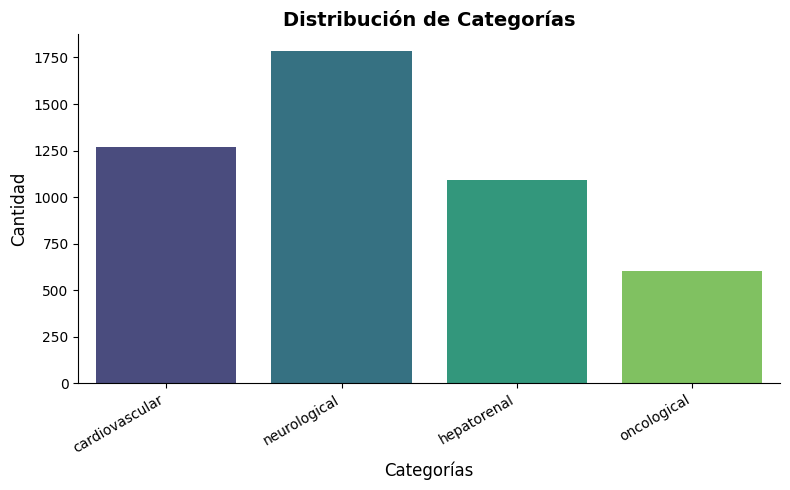

In [12]:
# Diagrama de Barras
plt.figure(figsize=(8, 5))
sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette="viridis")
plt.title("Distribución de Categorías", fontsize=14, fontweight="bold")
plt.ylabel("Cantidad", fontsize=12)
plt.xlabel("Categorías", fontsize=12)
plt.xticks(rotation=30, ha="right")
sns.despine()
plt.tight_layout()
plt.show()

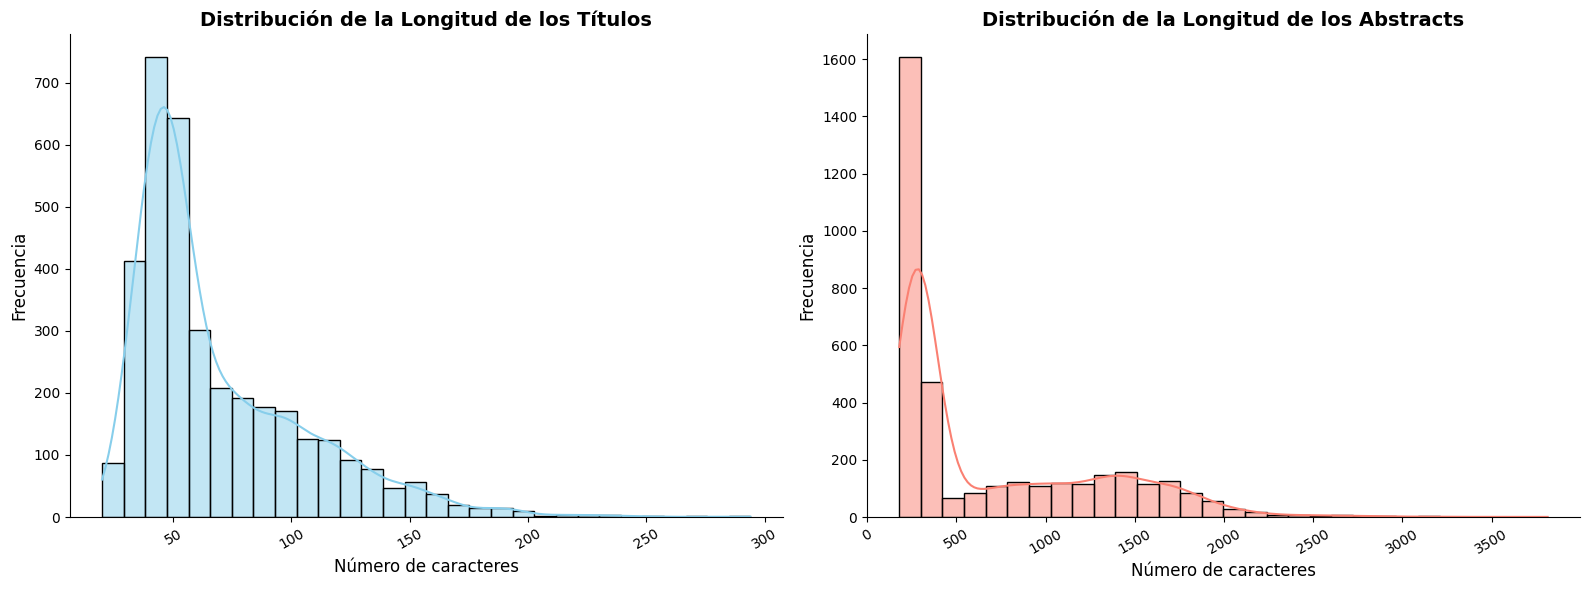

In [14]:
# Crear figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma de longitud de títulos
sns.histplot(df['title_length'], bins=30, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Distribución de la Longitud de los Títulos", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Número de caracteres", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)
axes[0].tick_params(axis='x', rotation=30)
sns.despine(ax=axes[0])

# Histograma de longitud de abstracts
sns.histplot(df['abstract_length'], bins=30, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Distribución de la Longitud de los Abstracts", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Número de caracteres", fontsize=12)
axes[1].set_ylabel("Frecuencia", fontsize=12)
axes[1].tick_params(axis='x', rotation=30)
sns.despine(ax=axes[1])

# Ajustes finales
plt.tight_layout()
plt.show()

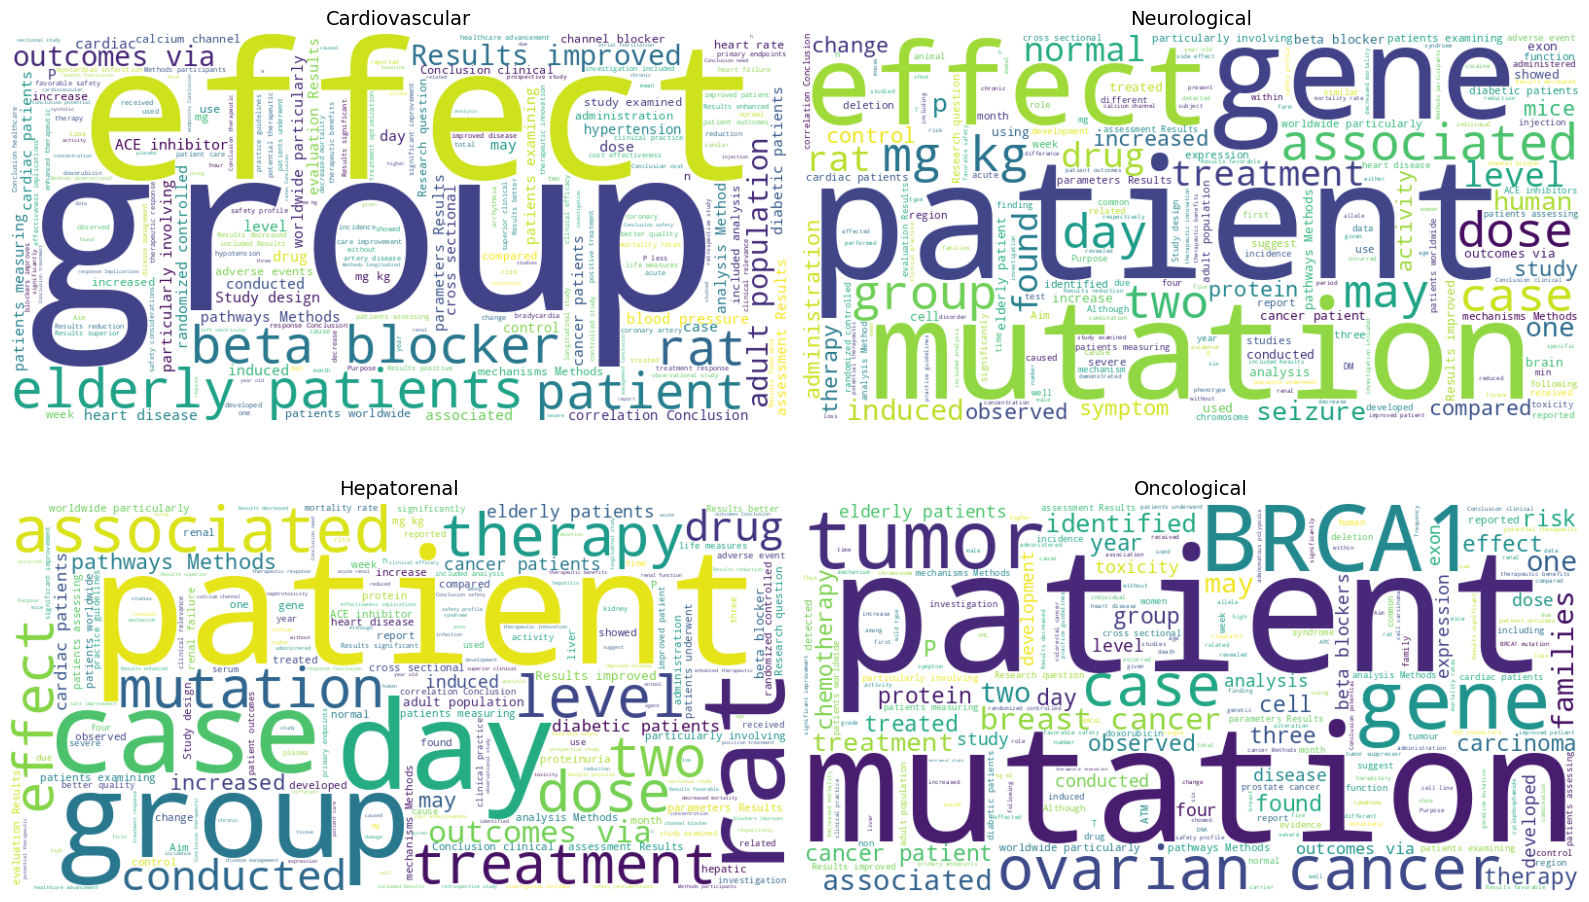

In [16]:
#  Nube de Palabras por Categorías

from wordcloud import WordCloud

# Asegurar que todas las etiquetas estén en formato capitalizado
df['group'] = df['group'].apply(lambda x: [etiqueta.strip().capitalize() for etiqueta in x] if isinstance(x, list) else [])

grupos = ['Cardiovascular', 'Neurological', 'Hepatorenal', 'Oncological']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, grupo in enumerate(grupos):
    textos = df[df['group'].apply(lambda x: grupo in x)]['abstract'].dropna().astype(str)
    texto_unido = ' '.join(textos)

    if len(texto_unido.strip()) > 0:
        nube = WordCloud(width=800, height=400, background_color='white').generate(texto_unido)
        axes[i].imshow(nube, interpolation='bilinear')
        axes[i].set_title(grupo, fontsize=14)
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, f"No hay texto para {grupo}", ha='center', va='center', fontsize=12)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

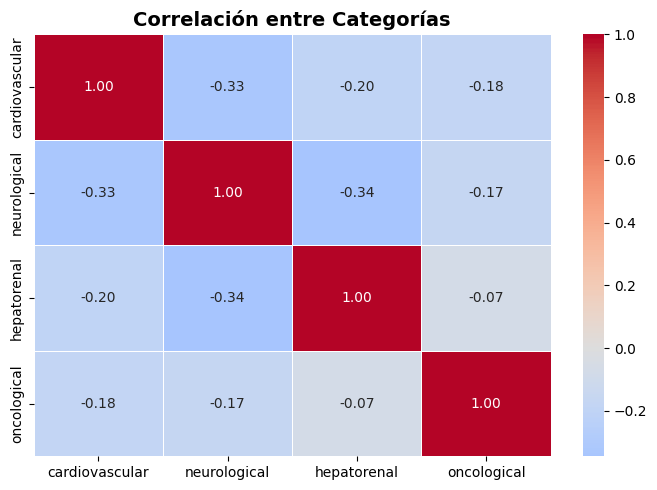

In [17]:
# Matrix de Correlación entre Categorías

categorias = ['cardiovascular', 'neurological', 'hepatorenal', 'oncological']
corr_matrix = df[categorias].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlación entre Categorías", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()